# Neural Network

This notebook outlines the building and training of **two-layer** and **three-layer** Recurrent Neural Networks (RNNs) for predicting Uber rideshare prices based on historical data. The model is compiled with the Adam optimizer and mean squared error loss function. Training involves 100 epochs with a batch size of 32 and includes a validation split to monitor performance on unseen data.

In [172]:
# Import necessary libraries 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, SimpleRNN, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras_tuner import RandomSearch, HyperParameters

In [152]:
df = pd.read_csv('../data/data_feature_engineering.csv')

In [153]:
X = df.drop('price', axis=1)
y = df['price']

In [154]:
# Normalize features
scaler_x = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_x.fit_transform(X)

In [155]:
# Normalize target variable
scaler_y = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler_y.fit_transform(df[['price']])

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(264454, 12) (66114, 12) (264454, 1) (66114, 1)


In [157]:
# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

#### What is a Neural Network?
The **Neural Network** is a cornerstone of deep learning - it consists of layers of interconnected nodes or "neurons," each capable of performing simple calculations. These neurons are organized in layers: an input layer that receives the data, hidden layers that process the data through weights and activation functions, and an output layer that produces the prediction or classification. This model is inspired by the structure and functions of the human brain's neural networks. Neural networks learn and improve their performance by adjusting the weights of connections between neurons based on the error of their predictions through the training process.

### Initial Definition and Training of the RNN Models

We construct a Sequential neural network comprised of one or two Long Short-Term Memory (LSTM) layers followed by a Dense layer. The LSTM layers are to capture long-term dependencies in sequential data, which makes them useful for time series forecasting or where the sequence of data points is crucial.
- The first LSTM layer contains 60 units and uses the ReLU activation function, with return_sequences=True to ensure that the output for each timestep is returned. This is so the next LSTM layer can receive sequences as inputs (architecture for stacking LSTM layers) The input_shape is defined as (1, X_train.shape[2]), which means that each input sequence consists of 1 timestep with a number of features equal to X_train.shape[2].
- The second LSTM layer, in the 3-layer model, also has 60 units and uses the ReLU activation function. This layer does not return sequences, so the model's output can transition from sequences to a single value prediction per input sequence.
- Finally, these is a Dense layer with a single unit, this is for producing the model's final output. 

In [158]:
# Simple RNN model architecture with 2 layers

# Initialize the Sequential model
model = Sequential()

# Add an Input layer to define the input shape
model.add(Input(shape=(1, X_train.shape[2])))

# Only one LSTM layer with 60 units, using ReLU activation function
# No return_sequences needed as it connects directly to a Dense layer next
model.add(LSTM(60, activation='relu'))

# Dense output layer with a single unit for regression output
model.add(Dense(1))


In [159]:
# RNN model architecture - 3 Layers

# Initialize the Sequential model
model2 = Sequential()

# Add an Input layer to define the input shape
model2.add(Input(shape=(1, X_train.shape[2])))

# First LSTM layer with 60 units, using ReLU activation function
model2.add(LSTM(60, activation='relu', return_sequences=True))

# Second LSTM layer, also returning sequences
# return_sequences=False by default, preparing for connection to Dense layer
model2.add(LSTM(60, activation='relu'))

# Dense output layer with a single unit for regression output
model2.add(Dense(1))

Next, we compile the models, and specify how they should be trained.

In [160]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')
model2.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

In [161]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100


6612/6612 ━━━━━━━━━━━━━━━━━━━━ 7s 865us/step - loss: 0.0024 - val_loss: 6.2781e-04
Epoch 2/100
6612/6612 ━━━━━━━━━━━━━━━━━━━━ 5s 768us/step - loss: 7.1395e-04 - val_loss: 6.2538e-04
Epoch 3/100
6612/6612 ━━━━━━━━━━━━━━━━━━━━ 5s 746us/step - loss: 6.7889e-04 - val_loss: 6.7547e-04
Epoch 4/100
6612/6612 ━━━━━━━━━━━━━━━━━━━━ 5s 780us/step - loss: 6.5973e-04 - val_loss: 6.4780e-04
Epoch 5/100
6612/6612 ━━━━━━━━━━━━━━━━━━━━ 5s 768us/step - loss: 6.5879e-04 - val_loss: 6.3828e-04
Epoch 6/100
6612/6612 ━━━━━━━━━━━━━━━━━━━━ 5s 708us/step - loss: 6.2509e-04 - val_loss: 6.1311e-04
Epoch 7/100
6612/6612 ━━━━━━━━━━━━━━━━━━━━ 5s 686us/step - loss: 6.3454e-04 - val_loss: 5.9924e-04
Epoch 8/100
6612/6612 ━━━━━━━━━━━━━━━━━━━━ 5s 766us/step - loss: 6.2517e-04 - val_loss: 5.6788e-04
Epoch 9/100
6612/6612 ━━━━━━━━━━━━━━━━━━━━ 5s 699us/step - loss: 6.3526e-04 - val_loss: 5.9598e-04
Epoch 10/100
6612/6612 ━━━━━━━━━━━━━━━━━━━━ 5s 711us/step - loss: 6.1573e-04 - val_loss: 6.8681e-04
Epoch 11/100
6612/6612 ━━

In [162]:
history2 = model2.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100


6612/6612 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.0021 - val_loss: 5.9335e-04
Epoch 2/100
6612/6612 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 6.4704e-04 - val_loss: 5.8323e-04
Epoch 3/100
6612/6612 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 6.0728e-04 - val_loss: 5.7825e-04
Epoch 4/100
6612/6612 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 6.0763e-04 - val_loss: 6.4480e-04
Epoch 5/100
6612/6612 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 5.9342e-04 - val_loss: 7.2955e-04
Epoch 6/100
6612/6612 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 6.0009e-04 - val_loss: 6.0229e-04
Epoch 7/100
6612/6612 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 5.8958e-04 - val_loss: 5.8720e-04
Epoch 8/100
6612/6612 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 5.8588e-04 - val_loss: 5.6147e-04
Epoch 9/100
6612/6612 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 5.7934e-04 - val_loss: 5.6659e-04
Epoch 10/100
6612/6612 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 5.9104e-04 - val_loss: 5.9729e-04
Epoch 11/100
6612/6612 ━━━━━━━━━━━━━━━━━━━━ 7

### Model Evaluation

In [163]:
# Evaluate the 2-layer model on the training and test set
train_loss_model = model.evaluate(X_train, y_train, verbose=0)
test_loss_model = model.evaluate(X_test, y_test, verbose=0)

# Convert losses from MSE to RMSE for the 2-layer model
train_loss_rmse_model = np.sqrt(train_loss_model)
test_loss_rmse_model = np.sqrt(test_loss_model)

# Predictions for training and test set using the 2-layer model
y_train_pred_model = model.predict(X_train)
y_test_pred_model = model.predict(X_test)

# R^2 score for training and test set using the 2-layer model
train_r2_model = r2_score(y_train, y_train_pred_model)
test_r2_model = r2_score(y_test, y_test_pred_model)

# Print the evaluation metrics for the 2-layer model
print("2-Layer Model Metrics:")
print(f'Training Loss (MSE): {train_loss_model:.4f}')
print(f'Training Loss (RMSE): {train_loss_rmse_model:.4f}')
print(f'Test Loss (MSE): {test_loss_model:.4f}')
print(f'Test Loss (RMSE): {test_loss_rmse_model:.4f}')
print(f'Training R^2 Score: {train_r2_model:.4f}')
print(f'Test R^2 Score: {test_r2_model:.4f}')

8265/8265 ━━━━━━━━━━━━━━━━━━━━ 2s 279us/step
2067/2067 ━━━━━━━━━━━━━━━━━━━━ 1s 287us/step
2-Layer Model Metrics:
Training Loss (MSE): 0.0006
Training Loss (RMSE): 0.0240
Test Loss (MSE): 0.0006
Test Loss (RMSE): 0.0239
Training R^2 Score: 0.9434
Test R^2 Score: 0.9430


In [164]:
# Evaluate the 3-layer model on the training and test set
train_loss_model2 = model2.evaluate(X_train, y_train, verbose=0)
test_loss_model2 = model2.evaluate(X_test, y_test, verbose=0)

# Convert losses from MSE to RMSE for the 3-layer model
train_loss_rmse_model2 = np.sqrt(train_loss_model2)
test_loss_rmse_model2 = np.sqrt(test_loss_model2)

# Predictions for training and test set using the 3-layer model
y_train_pred_model2 = model2.predict(X_train)
y_test_pred_model2 = model2.predict(X_test)

# R^2 score for training and test set using the 3-layer model
train_r2_model2 = r2_score(y_train, y_train_pred_model2)
test_r2_model2 = r2_score(y_test, y_test_pred_model2)

# Print the evaluation metrics for the 3-layer model
print("\n3-Layer Model Metrics:")
print(f'Training Loss (MSE): {train_loss_model2:.4f}')
print(f'Training Loss (RMSE): {train_loss_rmse_model2:.4f}')
print(f'Test Loss (MSE): {test_loss_model2:.4f}')
print(f'Test Loss (RMSE): {test_loss_rmse_model2:.4f}')
print(f'Training R^2 Score: {train_r2_model2:.4f}')
print(f'Test R^2 Score: {test_r2_model2:.4f}')


8265/8265 ━━━━━━━━━━━━━━━━━━━━ 5s 560us/step
2067/2067 ━━━━━━━━━━━━━━━━━━━━ 1s 403us/step

3-Layer Model Metrics:
Training Loss (MSE): 0.0005
Training Loss (RMSE): 0.0230
Test Loss (MSE): 0.0005
Test Loss (RMSE): 0.0229
Training R^2 Score: 0.9482
Test R^2 Score: 0.9477


In [ ]:
# Evaluate the best model on the training and test set
train_loss_best_model = best_model.evaluate(X_train, y_train, verbose=0)
test_loss_best_model = best_model.evaluate(X_test, y_test, verbose=0)

# Convert losses from MSE to RMSE for the best model
train_loss_rmse_best_model = np.sqrt(train_loss_best_model)
test_loss_rmse_best_model = np.sqrt(test_loss_best_model)

# Predictions for training and test set using the best model
y_train_pred_best_model = best_model.predict(X_train)
y_test_pred_best_model = best_model.predict(X_test)

# Ensure the predictions are appropriately shaped for regression tasks
y_train_pred_best_model = y_train_pred_best_model.flatten()
y_test_pred_best_model = y_test_pred_best_model.flatten()

# R^2 score for training and test set using the best model
train_r2_best_model = r2_score(y_train, y_train_pred_best_model)
test_r2_best_model = r2_score(y_test, y_test_pred_best_model)

# Print the evaluation metrics for the best model
print("\nBest Model Metrics:")
print(f'Training Loss (MSE): {train_loss_best_model:.4f}')
print(f'Training Loss (RMSE): {train_loss_rmse_best_model:.4f}')
print(f'Test Loss (MSE): {test_loss_best_model:.4f}')
print(f'Test Loss (RMSE): {test_loss_rmse_best_model:.4f}')
print(f'Training R^2 Score: {train_r2_best_model:.4f}')
print(f'Test R^2 Score: {test_r2_best_model:.4f}')

**Adding an Additional Layer?**
Given the performance metrics of the 3-layer RNN model, there's little indication that the model is underfitting and the model captures the underlying patterns in the dataset effectively. Adding a fourth layer likely will not significantly improve performance and could potentially instead lead to overfitting and lead to less computational efficiency. 

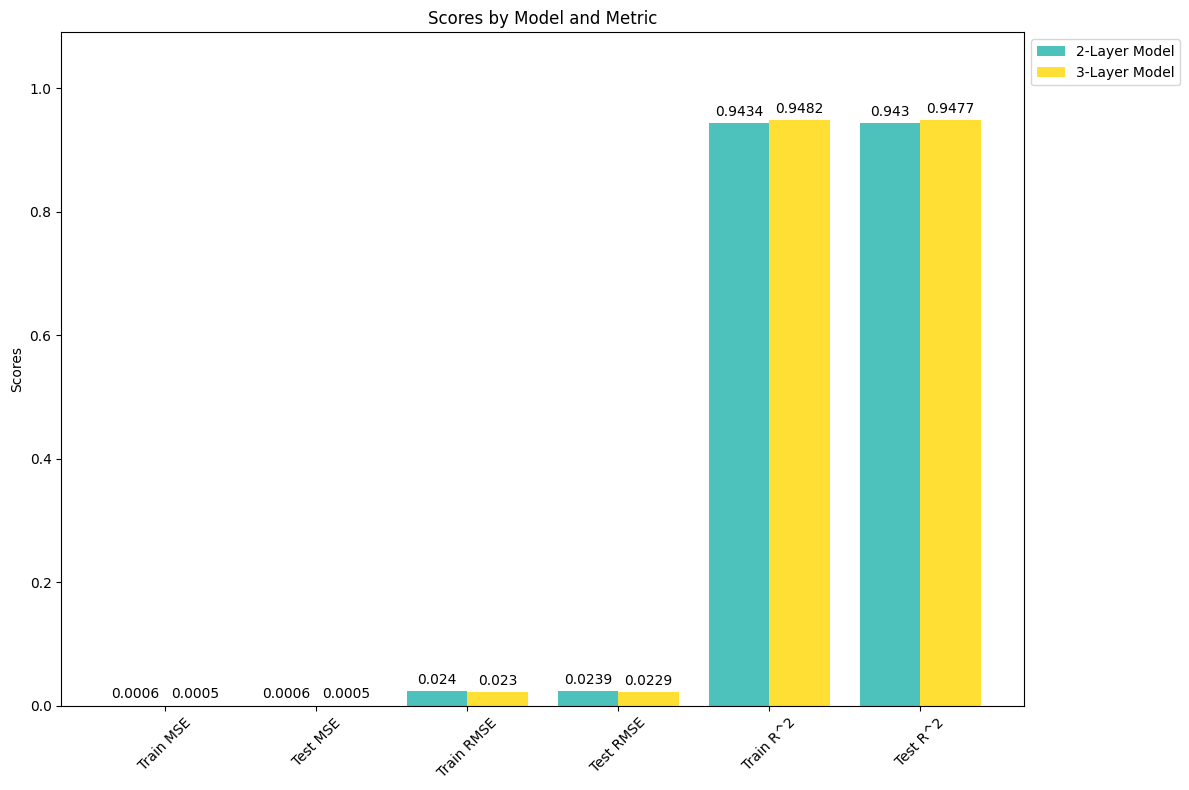

In [165]:
metrics_2_layer = [train_loss_model, test_loss_model, train_loss_rmse_model, test_loss_rmse_model, train_r2_model, test_r2_model]
metrics_3_layer = [train_loss_model2, test_loss_model2, train_loss_rmse_model2, test_loss_rmse_model2, train_r2_model2, test_r2_model2]
labels = ['Train MSE', 'Test MSE', 'Train RMSE', 'Test RMSE', 'Train R^2', 'Test R^2']

x = np.arange(len(labels))  
width = 0.4  

fig, ax = plt.subplots(figsize=(12, 8))  # Increase figure size for better visibility
rects1 = ax.bar(x - width/2, metrics_2_layer, width, label='2-Layer Model', alpha=0.8, color='lightseagreen')
rects2 = ax.bar(x + width/2, metrics_3_layer, width, label='3-Layer Model', alpha=0.8, color='gold')
ax.set_ylim(0, max(metrics_2_layer + metrics_3_layer) * 1.15)

# labels, title, x-axis tick labels
ax.set_ylabel('Scores')
ax.set_title('Scores by Model and Metric')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)  # Rotate for better readability
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move the legend out of the plot

# add labels on top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 4)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()


The 3-layer model has a slight improvement over the 2-layer model across most metrics. So, adding an additional LSTM layer helped capture more complex dependencies in the sequence data, leading to more accurate predictions. But, the marginal gains need to be weighed against increased computational complexity and training time. The R^2 scores for both training and test sets are high and close to 1, which indicates that the models can account for a significant proportion of variance in the target variable. 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step


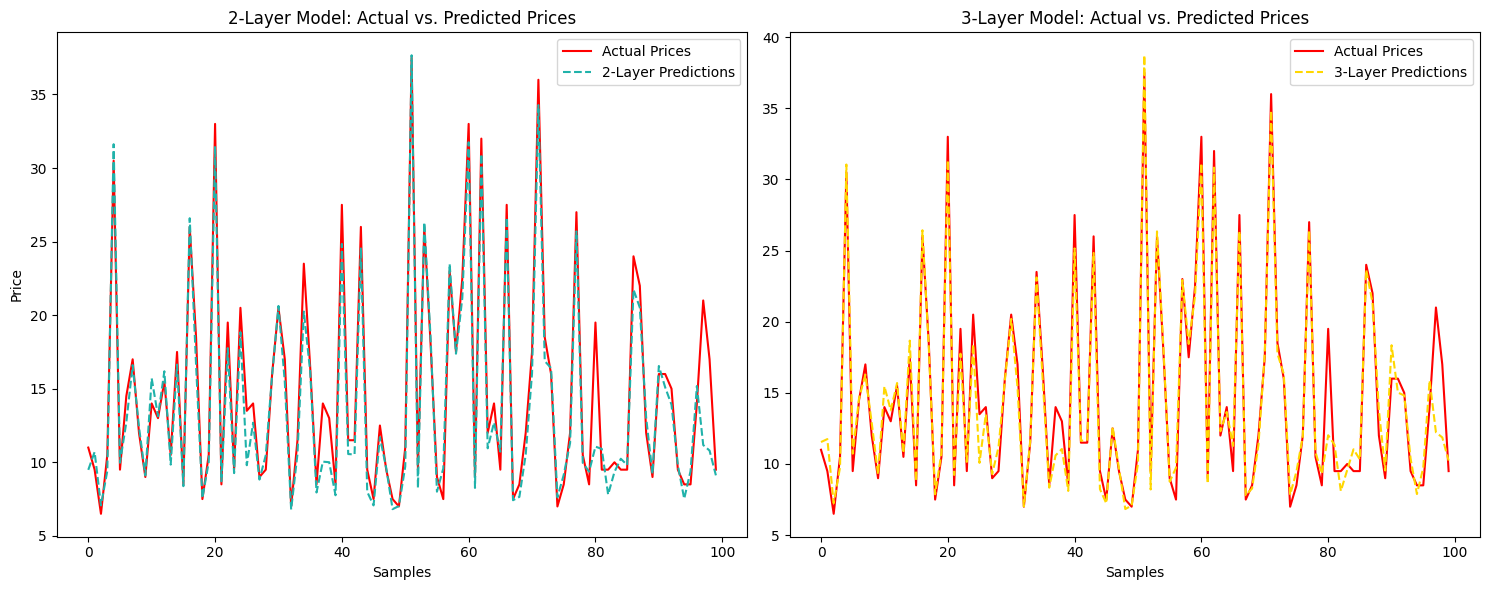

In [166]:
# Define a subset size for visualization
subset_size = 100  # Adjust as necessary

# Select a subset of actual and predicted prices
subset_indices = np.random.choice(a=len(y_test), size=subset_size, replace=False)  # Randomly select indices
actual_prices_subset = y_scaler.inverse_transform(y_test[subset_indices])
predicted_prices_model_subset = y_scaler.inverse_transform(model.predict(X_test[subset_indices]))
predicted_prices_model2_subset = y_scaler.inverse_transform(model2.predict(X_test[subset_indices]))

# Plotting
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(actual_prices_subset, label='Actual Prices', color='red')
plt.plot(predicted_prices_model_subset, label='2-Layer Predictions', color='lightseagreen', linestyle='--')
plt.title('2-Layer Model: Actual vs. Predicted Prices')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(actual_prices_subset, label='Actual Prices', color='red')
plt.plot(predicted_prices_model2_subset, label='3-Layer Predictions', color='gold', linestyle='--')
plt.title('3-Layer Model: Actual vs. Predicted Prices')
plt.xlabel('Samples')
plt.legend()

plt.tight_layout()
plt.show()


### Drawbacks

Some drawbacks of the Recurrent Neural Network (RNN), particularly LSTM (Long Short-Term Memory) models inclide trade-offs in complexity, computational demands, interpretability, and the effort and computational power required for feature engineering and hyperparameter tuning. The performance of neural networks heavily depends on the input features, so ignificant effort may be required in feature engineering and normalization so that the model receives high-quality inputs. Also, neural networks are "black boxes", in that they have high complexity and it is difficult to understand how they make predictions. This is drawback when we need to understand the decision-making process. Finally, deep learning models like LSTMs, are highly complex and have a large number of parameters, which can sometimes lead to overfitting, where the model learns the training data too well, including noise, making it less effective on unseen data.